In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Disclaimer

# What is a pandas DataFrame

Pandas is a library
    (import it, has a documentation website https://pandas.pydata.org/)
    
DataFrame is a datatype/datastructure/object
    the main offering of the pandas library
    
Pandas DataFrame 
    Robust tool for data wrangling and data analysis
    Exceptionally good documentation
    Synergizes with other Libraries
    
Use-case/motivation
    More convenient than numpy arrays
    More powerful than excel
    In-memory amount of data
    Millions of rows 

# Clear example of DataFrame

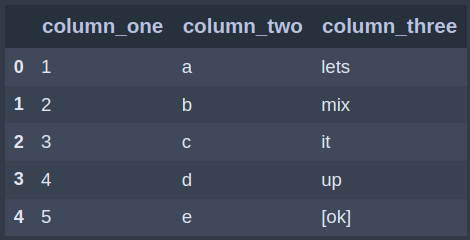

Column Indexes
Row Indexes
Multiple datatypes
Datatypes function of column
List of strings in the entry at [4,'column_three']

# How can we make a DataFrame?

1) read in a .csv file
2) from a python dictionary
3) from a pickle (special binary file)
4) from json (when you read tutorials that say "lets get this DataFrame data directly from the internet")

the list goes on


# Making the above DataFrame

Strategy: DataFrame from a python dictionary
(less common, but helpful for now)
we know how to make a list
we know how to make a dict

We make a dictionary where 
    - the keys are column names
    - the values are lists of actual data

In [1]:
#make the values
first=[1,2,3,4,5]
second=['a','b','c','d','e']
third=['lets','mix','it','up',['ok']]

In [2]:
#see what printing a list with a list in it looks like
print(third)

['lets', 'mix', 'it', 'up', ['ok']]


In [8]:
#assign the values to keys in a dictionary
my_dict={
    'column_one':first,
    'column_two':second,
    'column_three':third
}

In [9]:
#print the whole dictionary to see what it looks like
#note that the keys are ordered alphabetically when we use pprint (pretty print)
pprint(my_dict)

{'column_one': [1, 2, 3, 4, 5],
 'column_three': ['lets', 'mix', 'it', 'up', ['ok']],
 'column_two': ['a', 'b', 'c', 'd', 'e']}


In [10]:
#declare our dataframe using the "from dictionary approach"
my_DataFrame=pd.DataFrame.from_dict(my_dict)

In [11]:
#see our dataframe
my_DataFrame

,column_one,column_two,column_three
0,1,a,lets
1,2,b,mix
2,3,c,it
3,4,d,up
4,5,e,[ok]


# Accessing Values in a dataframe

### Accesing the Indices (indexes)

The indices are accessible and mutable (changeable)

In [12]:
print(my_DataFrame.index)
print(my_DataFrame.columns)

RangeIndex(start=0, stop=5, step=1)
Index(['column_one', 'column_two', 'column_three'], dtype='object')


Pandas has many functions that operate-on and/or accept indexes

We can also use the column indices to access columns (a column is called a "series") in some contexts

In [13]:
my_DataFrame['column_three']

0    lets
1     mix
2      it
3      up
4    [ok]
Name: column_three, dtype: object

### Accesing by numeric location

dataframes can be accessed like traditional lists (according to numerical position)
mildly dangerous approach if you are writing for long-term projects

In [14]:
my_DataFrame.iloc[2,1]

'c'

### Accessing by index

"at" is a good choice for single-value access

In [15]:
my_DataFrame.at[2,'column_three']

'it'

"loc" is a good choice for "slicing" a dataframe
(provide a list of row-indexes and a list of column-indexes)

In [17]:
my_DataFrame.loc[0:2,['column_two','column_three']]

,column_two,column_three
0,a,lets
1,b,mix
2,c,it


### Accessing by condition

loc is a good choice for choosing subsets based on a condition
we can place the conditions where we placed lists earlier using loc
(fyi: under the hood, python turns the condition into a list of True/False)

In [18]:
my_DataFrame.loc[
    my_DataFrame['column_one'] > 2
]

,column_one,column_two,column_three
2,3,c,it
3,4,d,up
4,5,e,[ok]


# Operations on a DF

### Simple Operations

Taking the average of a column
Adding a constant to a column
Stripping the whitespace from the ends of strings in a column

General advice = There is a built-in function for this. It will be fast and error free (assuming that the result is tested, etc). Google your needs and use the reusults

In [19]:
my_DataFrame.column_one.mean()

3.0

In [20]:
my_DataFrame.column_one+5

0     6
1     7
2     8
3     9
4    10
Name: column_one, dtype: int64

In [21]:
#notice in the above we did not assign the output of "my_DataFrame.column_one+5" to anything.
#so the original dataframe remains unchanged
my_DataFrame

,column_one,column_two,column_three
0,1,a,lets
1,2,b,mix
2,3,c,it
3,4,d,up
4,5,e,[ok]


In [23]:
#certain methods that operate on strings require accessing the string representation
#of the data stored in a colum
my_DataFrame.column_two.str.strip()

0    a
1    b
2    c
3    d
4    e
Name: column_two, dtype: object

### More Complicated Operations

General advice: certain operations are difficult/impossible to express using built-in functions. Especially if the project does not call for it, do not break your back to force the use of fast functions.

Instead, consider doing things "element-wise" "in a for-loop"

Example: each element in a column is searched against a database

In [26]:
#iterrows gives us two things that we iterate over simultaneously, much like enumerate() on a
#"normal" list
for temporary_index,temporary_row in my_DataFrame.iterrows():
    #here, we just print because we dont want to write some weird function for the purposes
    #of demonstration.
    print(temporary_row['column_one']+3)

4
5
6
7
8


# Wrangling and Synergies with other libraries

### Getting a larger dataset

from https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

In [60]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [61]:
fetch_housing_data()

In [62]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [63]:
housing_dataset = load_housing_data()

In [64]:
housing_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Basic inspection

In [80]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [81]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [34]:
#null inspects for the value "np.nan" which is numpy's null
#clearly, this operated on a cell-by-cell basis
housing_dataset.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [35]:
#we can sum the number of trues (think of it as adding the number of 1s and 0s)
#pandas generally operates on a per-column basis
housing_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

So there are about 200 missing values.
What else can be wrong with the data? Maybe someone typed "two" in one of the total_rooms
when they meant 2

In [37]:
housing_dataset.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

dtypes seems pretty good

normally, we might consider imputing missing values. for the purposes of this exercise, we will just delete the rows that contain missin values.
also, we could pass a view with the missing values not present
also, some functions accept a "skip na" argument

In [65]:
#here we provide a condition like we saw up above
housing_dataset=housing_dataset.loc[
    housing_dataset.total_bedrooms.isnull()==False,
    #it is very important to provide the : as an indicator to choose all rows.
    #in this way, we avoid a view vs copy error
    :
]

In [40]:
housing_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


notice how the #rows no longer matches index

In [41]:
housing_dataset.reset_index(
    inplace=True,
    drop=True
)

### Checking scatterplots and histograms

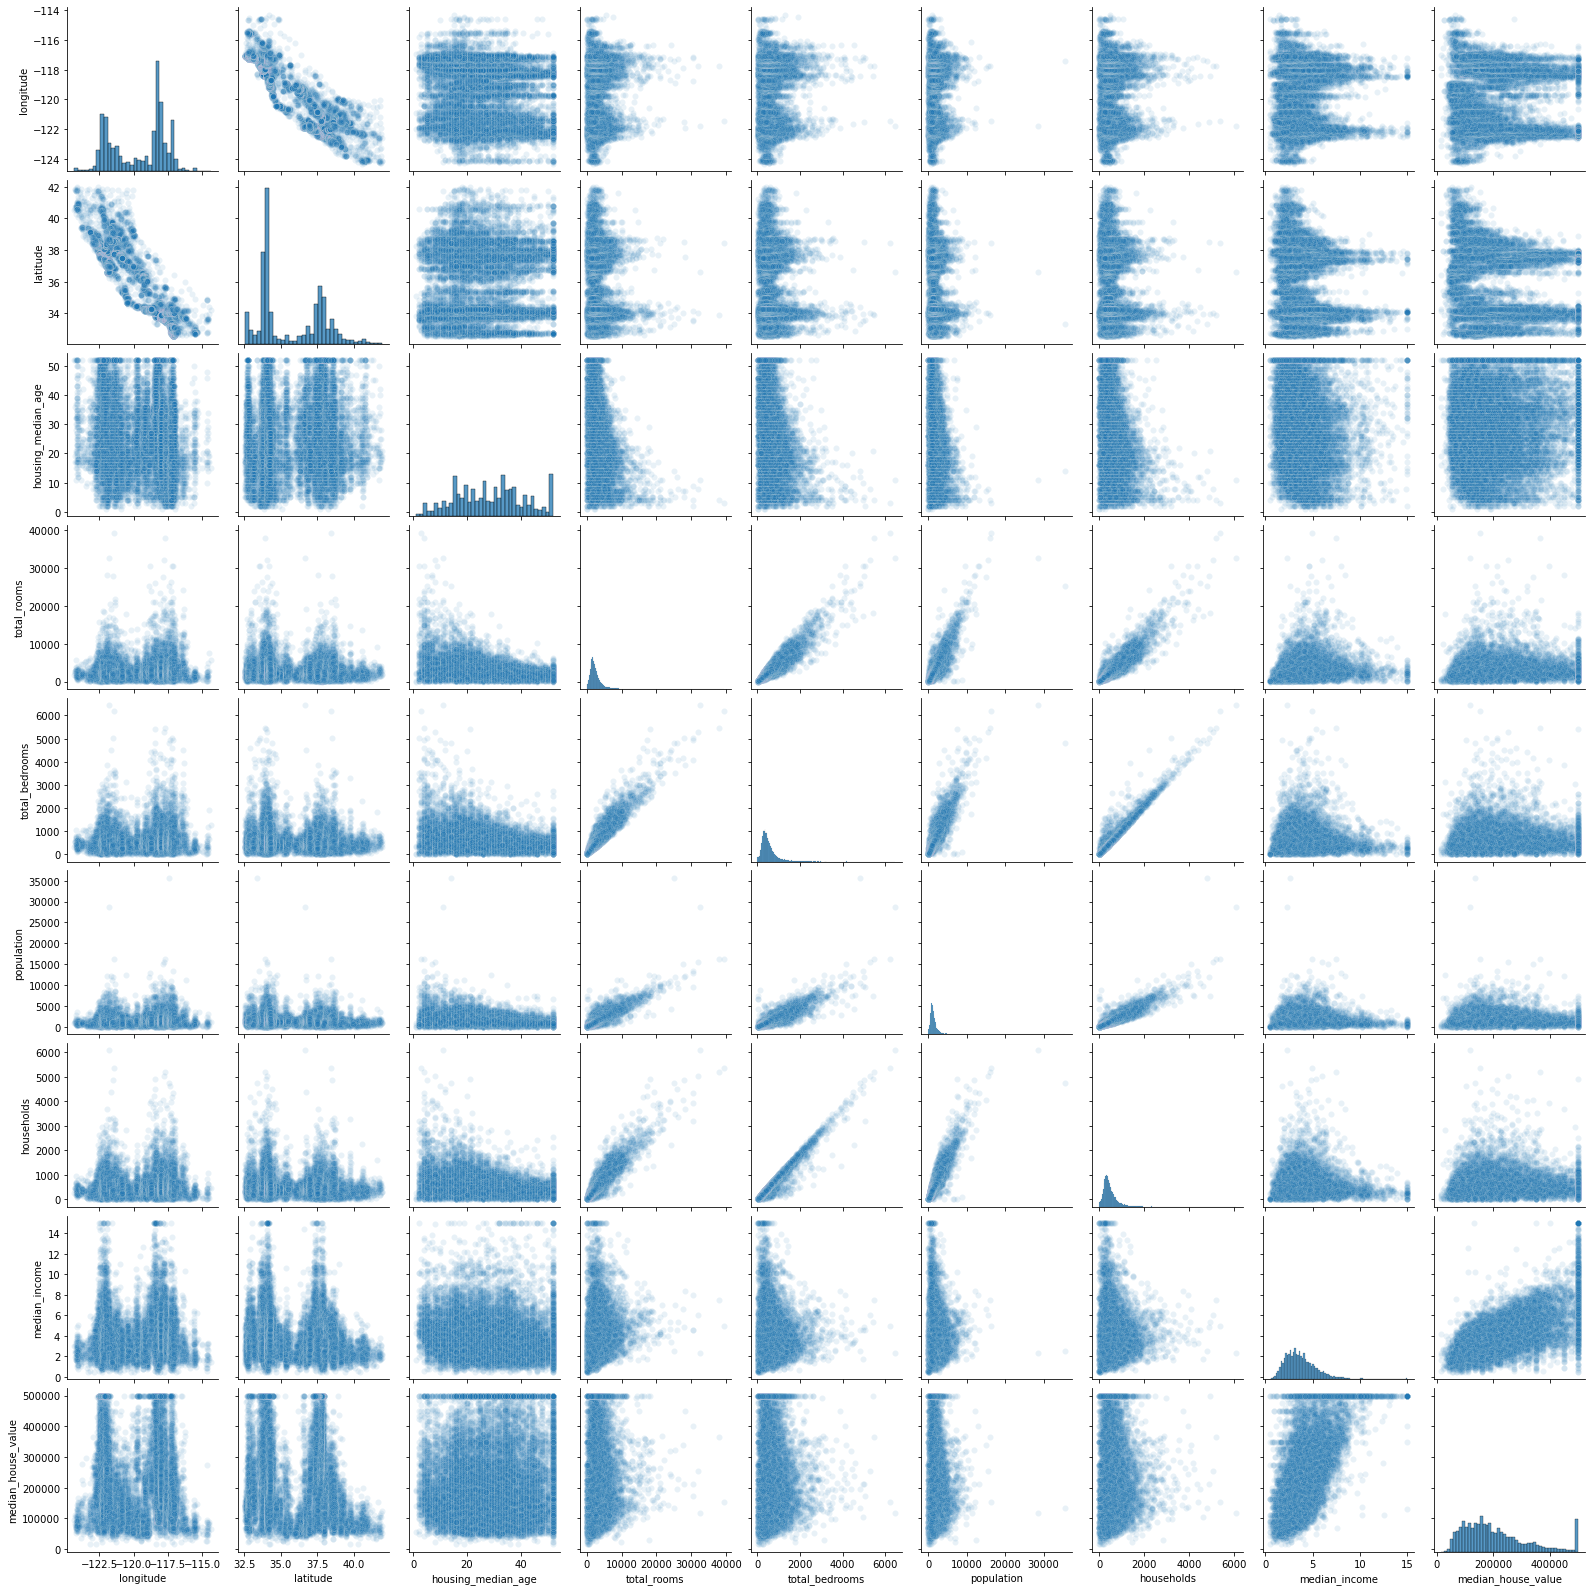

In [73]:
sns.pairplot(
    housing_dataset,
    #plot_kws={'scatter_kws': {'alpha': 0.1}}
    #alpha=0.1
    plot_kws={'alpha':0.1}
)

In [53]:
housing_dataset[['longitude','latitude','total_rooms','median_income']]

,longitude,latitude,total_rooms,median_income
0,-122.23,37.88,880.0,8.3252
1,-122.22,37.86,7099.0,8.3014
2,-122.24,37.85,1467.0,7.2574
3,-122.25,37.85,1274.0,5.6431
4,-122.25,37.85,1627.0,3.8462
...,...,...,...,...
20428,-121.09,39.48,1665.0,1.5603
20429,-121.21,39.49,697.0,2.5568
20430,-121.22,39.43,2254.0,1.7000
20431,-121.32,39.43,1860.0,1.8672


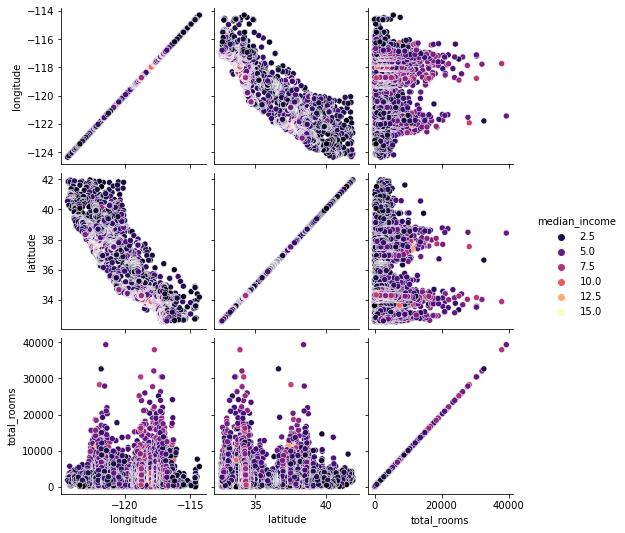

In [67]:
#color_map=sns.color_palette("magma", as_cmap=True)
sns.pairplot(
    housing_dataset[['longitude','latitude','total_rooms','median_income']],
    hue='median_income',
    palette='magma',
    diag_kind=None
)

In [45]:
housing_dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [55]:
housing_dataset.total_rooms.max()

39320.0

In [57]:
housing_dataset.total_rooms.min()

2.0

In [58]:
housing_dataset=housing_dataset.loc[
    housing_dataset.total_rooms<=100,
    :
]

/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Datas

/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/rictuar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Datas

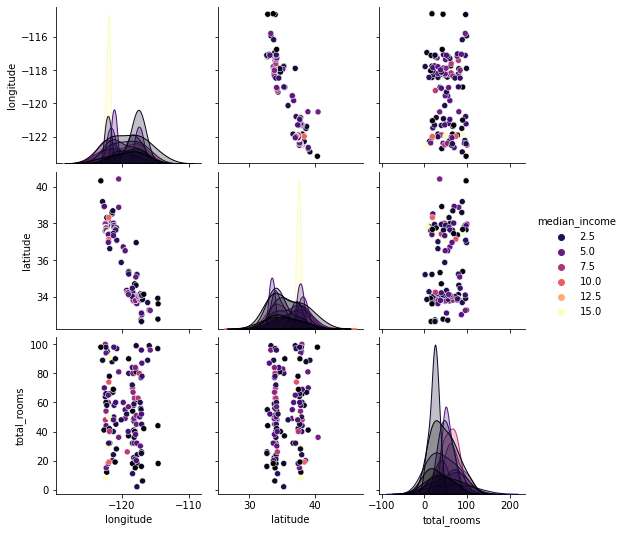

In [59]:
#color_map=sns.color_palette("magma", as_cmap=True)
sns.pairplot(
    housing_dataset[['longitude','latitude','total_rooms','median_income']],
    hue='median_income',
    palette='magma'
)

In [ ]:
# gotchas
-setting on a view vs a copy
-passing things to functions

In [75]:
housing_dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<AxesSubplot:>

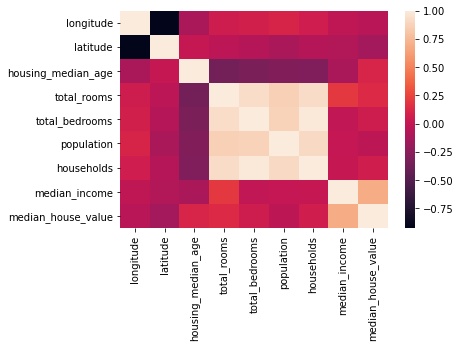

In [76]:
sns.heatmap(
    housing_dataset.corr()
)